In [4]:
%matplotlib notebook

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [6]:
# Study data files
Atl_2019_crime = "./Resources/2019_CrimeData_ATL.csv"
Atl_2020_crime = "./Resources/2020_Crime_Data_ATL.csv"
covid_data = "./Resources/Georgia_COVID-19 EDITED.csv"
unemployment = "./Resources/GAUR.csv"

In [9]:
crime_may2019 = pd.read_csv(Atl_2019_crime)
crime_may2019.head()

,UC2_Literal,Report Number,Report Date,Location,Beat,Neigborhood,NPU,Lat,Long
0,ROBBERY,191510360,5/31/2019,472 COURTLAND ST NE,509,Downtown,M,33.76763,-84.38419
1,ROBBERY,191511609,5/31/2019,2423 MARTIN L KING JR DR NW,108,Florida Heights,I,33.75183,-84.46623
2,ROBBERY,191511411,5/31/2019,1342 PRYOR RD SW,305,High Point,Y,33.71850,-84.39341
3,AGG ASSAULT,191510268,5/31/2019,151 CLEVELAND AVE SW,310,Browns Mill Park,Z,33.68148,-84.39422
4,AGG ASSAULT,191511544,5/31/2019,1083 EUCLID AVE NE,602,Inman Park,N,33.76323,-84.35155


In [11]:
unemployment_2020_df = pd.read_csv(unemployment)
unemployment_2020_df

,DATE,%
0,1/1/19,3.8
1,2/1/19,3.7
2,3/1/19,3.7
3,4/1/19,3.6
4,5/1/19,3.6
5,6/1/19,3.5
6,7/1/19,3.4
7,8/1/19,3.3
8,9/1/19,3.2
9,10/1/19,3.2


In [15]:
covid_df = pd.read_csv(covid_data)
covid_df

,COUNTY,DATE STAMP,FEMALE,MALE,SEX UNKNOWN,SUM CASES
0,NON-GEORGIA RESIDENT,4/16/2020,220,222,69,511
1,NON-GEORGIA RESIDENT,4/17/2020,233,242,72,547
2,NON-GEORGIA RESIDENT,4/18/2020,237,246,77,560
3,NON-GEORGIA RESIDENT,4/19/2020,245,253,83,581
4,NON-GEORGIA RESIDENT,4/20/2020,254,261,91,606
...,...,...,...,...,...,...
47613,WALKER,9/1/2020,615,602,22,1239
47614,WALKER,9/2/2020,630,610,22,1262
47615,WALKER,9/3/2020,646,618,22,1286
47616,WALKER,9/4/2020,655,629,23,1307


In [84]:
covid_count_county_df = covid_df.loc[covid_df['COUNTY'] == 'FULTON']
#covid_count_county_df = covid_df(['FULTON'])
covid_count_county_df['DATE STAMP'] = pd.to_datetime(covid_count_county_df['DATE STAMP'])
covid_count_county_df

,COUNTY,DATE STAMP,FEMALE,MALE,SEX UNKNOWN,SUM CASES
0,FULTON,2020-04-16,220,222,69,511
1,FULTON,2020-04-17,233,242,72,547
2,FULTON,2020-04-18,237,246,77,560
3,FULTON,2020-04-19,245,253,83,581
4,FULTON,2020-04-20,254,261,91,606
...,...,...,...,...,...,...
47613,FULTON,2020-09-01,615,602,22,1239
47614,FULTON,2020-09-02,630,610,22,1262
47615,FULTON,2020-09-03,646,618,22,1286
47616,FULTON,2020-09-04,655,629,23,1307


<IPython.core.display.Javascript object>


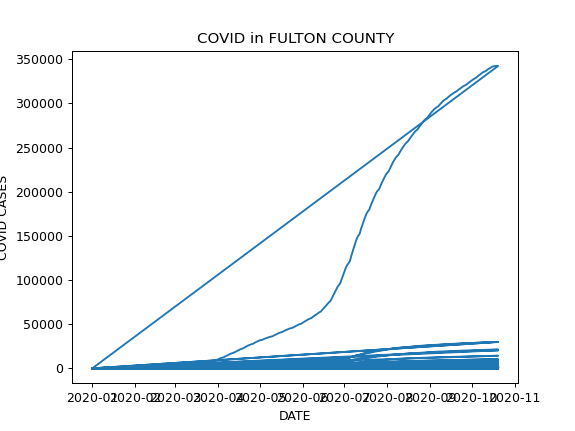

In [89]:
plt.plot(covid_count_county_df['DATE STAMP'], covid_count_county_df['SUM CASES'])
plt.xlabel("DATE")
plt.ylabel("COVID CASES")
plt.title("COVID in FULTON COUNTY")
plt.show()

In [28]:
crime_may2020 = pd.read_csv(Atl_2020_crime)
crime_may2020.head()

,UC2_Literal,Report Number,Report Date,Location,Beat,Neigborhood,NPU,Lat,Long
0,ROBBERY,201520053,5/31/2020,1362 BOULEVARD SE,607.0,Benteen Park,W,33.71744,-84.36818
1,LARCENY-FROM VEHICLE,201520174,5/31/2020,17 BAKER ST NE,509.0,Downtown,M,33.76215,-84.38675
2,BURGLARY,201520199,5/31/2020,1980 DELOWE DR SW,410.0,Campbellton Road,R,33.70106,-84.45698
3,LARCENY-FROM VEHICLE,201520274,5/31/2020,1754 RICHMOND CIR SE,307.0,Lakewood Heights,Y,33.70698,-84.37450
4,AGG ASSAULT,201520296,5/31/2020,991 STONEWALL DR SE,308.0,Leila Valley,Z,33.68995,-84.35680


In [29]:
crime_may2019.columns

Index(['UC2_Literal', 'Report Number', 'Report Date', 'Location', 'Beat',
       'Neigborhood', 'NPU', 'Lat', 'Long'],
      dtype='object')

In [30]:
# clean data
crime_2019_df = crime_may2019.loc[:, ["UC2_Literal","Neigborhood", "Report Date"]]
crime_2019_df.head()

,UC2_Literal,Neigborhood,Report Date
0,ROBBERY,Downtown,5/31/2019
1,ROBBERY,Florida Heights,5/31/2019
2,ROBBERY,High Point,5/31/2019
3,AGG ASSAULT,Browns Mill Park,5/31/2019
4,AGG ASSAULT,Inman Park,5/31/2019


In [31]:
# clean data
crime_2020_df = crime_may2020.loc[:, ["UC2_Literal","Neigborhood", "Report Date"]]
crime_2020_df.head()

,UC2_Literal,Neigborhood,Report Date
0,ROBBERY,Benteen Park,5/31/2020
1,LARCENY-FROM VEHICLE,Downtown,5/31/2020
2,BURGLARY,Campbellton Road,5/31/2020
3,LARCENY-FROM VEHICLE,Lakewood Heights,5/31/2020
4,AGG ASSAULT,Leila Valley,5/31/2020


In [32]:
Neighborhood_summary_data_2019_df = crime_2019_df.groupby(["Neigborhood"])
crime_temp_df_19 = crime_group_by_neigborhood_2019.count()
crime_temp_df_2019 = crime_temp_df_19.loc[:, ["UC2_Literal"]]
crime_temp_df_2019.rename(columns = {'UC2_Literal':'Crimes 2019'}, inplace = True) 
crime_temp_df_2019

,Crimes 2019
Neigborhood,
Adair Park,15
Adams Park,6
Adamsville,32
Almond Park,4
Amal Heights,1
...,...
Wildwood (NPU-H),3
Wilson Mill Meadows,3
Wisteria Gardens,2


In [33]:
crime_group_by_neigborhood_2019_df=pd.read_csv("./Resources/2019_CrimeData_ATL.csv")
crime_group_by_neigborhood_2019_df


,UC2_Literal,Report Number,Report Date,Location,Beat,Neigborhood,NPU,Lat,Long
0,ROBBERY,191510360,5/31/2019,472 COURTLAND ST NE,509,Downtown,M,33.76763,-84.38419
1,ROBBERY,191511609,5/31/2019,2423 MARTIN L KING JR DR NW,108,Florida Heights,I,33.75183,-84.46623
2,ROBBERY,191511411,5/31/2019,1342 PRYOR RD SW,305,High Point,Y,33.71850,-84.39341
3,AGG ASSAULT,191510268,5/31/2019,151 CLEVELAND AVE SW,310,Browns Mill Park,Z,33.68148,-84.39422
4,AGG ASSAULT,191511544,5/31/2019,1083 EUCLID AVE NE,602,Inman Park,N,33.76323,-84.35155
...,...,...,...,...,...,...,...,...,...
2322,LARCENY-NON VEHICLE,191210497,5/1/2019,1815 MARTIN L KING JR DR NW,108,NaN,I,33.75092,-84.44661
2323,LARCENY-NON VEHICLE,191210739,5/1/2019,797 VIRGINIA AVE NE,601,Virginia Highland,F,33.78163,-84.36075
2324,LARCENY-NON VEHICLE,191211613,5/1/2019,9 WHATLEY ST SE,307,Lakewood Heights,Y,33.70704,-84.37856
2325,LARCENY-NON VEHICLE,191210486,5/1/2019,339 HOLLY ST NW,107,Grove Park,J,33.76460,-84.43757


In [34]:

crime_df = crime_group_by_neigborhood_2019_df[['Neigborhood', 'UC2_Literal']]
grouped_by_crime_df = crime_df.groupby("UC2_Literal")

crime_count = grouped_by_crime_df["Neigborhood"].count()
crime_count_df = crime_count.to_frame()
crime_count_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

,UC2_Literal,Neigborhood
0,AGG ASSAULT,211
1,AUTO THEFT,274
2,BURGLARY,273
3,HOMICIDE,8
4,LARCENY-FROM VEHICLE,831
5,LARCENY-NON VEHICLE,529
6,ROBBERY,104


In [37]:
crime_summary_data_2019 = crime_2019_df 
crime_group_by_neigborhood_2019 = crime_summary_data_2019.groupby(["Neigborhood"])
crime_temp_df_19 = crime_group_by_neigborhood_2019.count()
crime_temp_df_2019 = crime_temp_df_19.loc[:, ["UC2_Literal"]]
crime_temp_df_2019.rename(columns = {'UC2_Literal':'Crimes 2019'}, inplace = True) 
crime_temp_df_2019

,Crimes 2019
Neigborhood,
Adair Park,15
Adams Park,6
Adamsville,32
Almond Park,4
Amal Heights,1
...,...
Wildwood (NPU-H),3
Wilson Mill Meadows,3
Wisteria Gardens,2


In [38]:
#y_axis = np.arange(len(crime_count_df))
x_axis = np.arange(len(crime_count_df))

plt.plot("x-axis", marker="o", markersize=10, color="deepskyblue")

# Set up plot title, xlable, and ylabel
plt.title("Crime rate versus Neigborhood")
plt.xlabel('Neigborhood')
plt.ylabel('Crime rate')

# Set up plot xlim
plt.xlim(0, 300)
plt.ylim(0, 300)
# Add grid onto plot background
plt.grid()
#plt.savefig("./landfills_per_state_linechart.png")
plt.show()




In [ ]:
x_values = census_data_complete[‘Poverty Rate’].astype(‘float’)
y_values = census_data_complete[‘Bank Count’].astype(‘float’)
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = “y = ” + str(round(slope,2)) + “x + ” + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,“r-“)
plt.annotate(line_eq,(6,10),fontsize=15,color=“red”)
# Label plot
plt.xlabel(‘Poverty Rate’)
plt.ylabel(‘Bank Count’)
# Print r square value
print(f”R squared: {rvalue**2}“)
# Show plot
plt.show()


In [44]:
#Scatter plot ith crime per capita and median income by neighborhood
scat_x = crime_temp_df_2019["Neigborhood"]
scat_y = crime_temp_df_2019["Crimes 2019"]
plt.scatter(scat_x, scat_y)
plt.xlabel("Neigborhood")
plt.ylabel("Total Crimes")
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(scat_x, scat_y)
regress_values = scat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(scat_x,regress_values,"r-")
plt.annotate(line_eq,(100, 1.5),fontsize=15,color="red")

KeyError: 'Crimes 2019'

In [17]:
crime_summary_data_2020 = crime_2020_df 
crime_group_by_neigborhood_2020 = crime_summary_data_2020.groupby(["Neigborhood"])
crime_temp_df_20 = crime_group_by_neigborhood_2020.count()
crime_temp_df_2020 = crime_temp_df_20.loc[:, ["UC2_Literal"]]
crime_temp_df_2020.rename(columns = {'UC2_Literal':'Crimes 2020'}, inplace = True) 
crime_temp_df_2020

,Crimes 2020
Neigborhood,
Adair Park,112
Adams Park,55
Adamsville,118
Almond Park,28
Ansley Park,28
...,...
Whittier Mill Village,7
Wildwood (NPU-C),56
Wilson Mill Meadows,7


In [18]:
# Merge two dataframes using an outer join
crime_19_20_df = pd.merge(crime_temp_df_2019, crime_temp_df_2020, on="Neigborhood", how="outer")
crime_19_20_df

,Crimes 2019,Crimes 2020
Neigborhood,,
Adair Park,15.0,112.0
Adams Park,6.0,55.0
Adamsville,32.0,118.0
Almond Park,4.0,28.0
Amal Heights,1.0,NaN
...,...,...
Ridgecrest Forest,NaN,7.0
Rue Royal,NaN,7.0
Springlake,NaN,7.0


In [19]:
# Delete N/A
crime_clear = crime_19_20_df.dropna(how='any')
crime_clear

,Crimes 2019,Crimes 2020
Neigborhood,,
Adair Park,15.0,112.0
Adams Park,6.0,55.0
Adamsville,32.0,118.0
Almond Park,4.0,28.0
Ansley Park,3.0,28.0
...,...,...
Whittier Mill Village,3.0,7.0
Wildwood (NPU-C),4.0,56.0
Wilson Mill Meadows,3.0,7.0


In [12]:
covid_df = pd.read_csv(covid_data)
covid_df.head()

,COUNTY,DATE STAMP,FEMALE,MALE,SEX UNKNOWN,SUM CASES
0,NON-GEORGIA RESIDENT,4/16/2020,220,222,69,511
1,NON-GEORGIA RESIDENT,4/17/2020,233,242,72,547
2,NON-GEORGIA RESIDENT,4/18/2020,237,246,77,560
3,NON-GEORGIA RESIDENT,4/19/2020,245,253,83,581
4,NON-GEORGIA RESIDENT,4/20/2020,254,261,91,606


In [ ]:
# clean data
# rename colums
covid_2020_df = covid_df.loc[:, ["COUNTY","DATE STAMP", "SUM CASES"]]
covid_2020_df.rename(columns = {'COUNTY':'County','DATE STAMP': 'Report Date', 
                                'SUM CASES': 'Cases'}, inplace = True) 

covid_2020_df.head()

In [ ]:
unemployment = pd.read_csv(unemployment)
unemployment

In [ ]:
Atl_2019_crime = "./Resources/2019_CrimeData_ATL.csv"
crime_temp_df_2019=pd.read_csv(Atl_2019_crime)
crime_temp_df_2019

In [ ]:
Neighborhood_counts=crime_temp_df_2019['Neigborhood'].value_counts()
Neighborhood_counts

In [ ]:
crime_rate = len("Report Number")
crime_rate

<IPython.core.display.Javascript object>


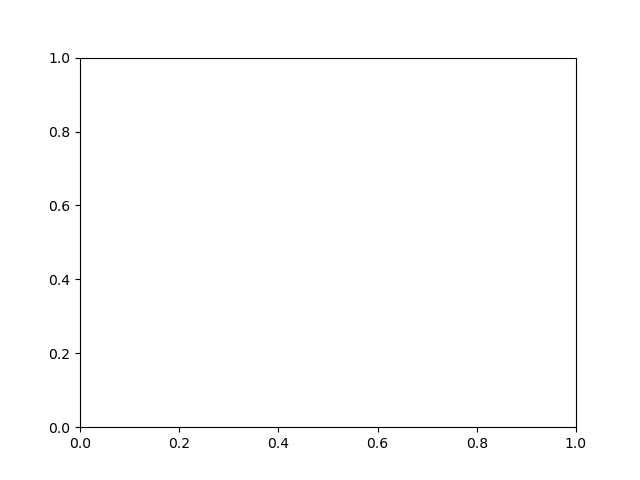

NameError: name 'plot' is not defined

In [42]:


from matplotlib import pyplot as plt


Atl_2019_crime = "./Resources/2019_CrimeData_ATL.csv"
crime_temp_df_2019=pd.read_csv(Atl_2019_crime)
fig=plt.figure()
#ax=fig.add_axes([0,0,1,1])
plot.scatter(crime_count_df['Neigborhood_counts', 'Report Number'],s=175, color="blue")
#ax.scatter(grades_range, boys_grades, color='b')
plot.set_xlabel('Neigborhood')
plot.set_ylabel('Crimes_2019')
plot.set_title('scatter plot')
plt.show()